## The project this week is to find out what would have been the best two weeks of weather for a 2014 vacation in a capital of a BRICS country.So I'll be using China with Beinjing as capital ##




**The first thing to do is to import important libraries that will give us this objectives**

import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
from datetime import datetime 
beinjing = pd.read_csv('Beijing_PEK_2014.csv', skipinitialspace=True)
beinjing.head()


let us begin by seeing all the headings of the columns

In [2]:
beinjing.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

### Cleaning the data
First we need to clean up the data. I'm not going to make use of 'WindDirDegrees' in my analysis, so we'll rename 'WindDirDegrees< br />' to 'WindDirDegrees'.

In [3]:
beinjing = beinjing.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

**We remove the redundant ('<br ') from the column also**

In [4]:
beinjing['WindDirDegrees'] = beinjing['WindDirDegrees'].str.rstrip('<br />')

**We also change the values to float**

In [5]:
beinjing['WindDirDegrees'] = beinjing['WindDirDegrees'].astype('float64')  

**We need to change the date into the correct format**

In [8]:
beinjing['Date'] = pd.to_datetime(beinjing['Date'])

**Let us cross check to be sure all the columns have the correct data type **

In [10]:
beinjing['Date'] = pd.to_datetime(beinjing['Date'])
beinjing.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

**We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs:** 

In [11]:
beinjing.index = beinjing['Date']

## Finding a summer break
According to meteorologists, summer extends for the whole months of ,May 15th to Sept 15th . I'll then use the date.index like this:

In [12]:
summer = beinjing.loc[datetime(2014,5,15) : datetime(2014,9,15)]

**We now show only days with temperature above or equals to 25 C**

In [13]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-22,2014-05-22,35,27,19,18,14,8,88,48,12,...,14,4,2,29,11,NaN,0.00,NaN,NaN,167.0
2014-05-23,2014-05-23,34,27,20,16,13,9,73,40,16,...,14,8,5,29,11,40.0,0.00,NaN,Rain,175.0
2014-05-28,2014-05-28,37,26,15,12,7,1,68,28,6,...,27,19,6,35,10,50.0,0.00,NaN,NaN,189.0
2014-05-29,2014-05-29,42,30,18,15,11,3,68,33,5,...,31,14,10,21,6,43.0,0.00,2.0,NaN,72.0
2014-05-30,2014-05-30,35,28,20,15,13,10,60,37,21,...,13,9,7,21,10,NaN,0.00,NaN,NaN,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-23,2014-08-23,33,27,22,23,21,16,94,69,40,...,10,5,2,26,6,32.0,0.51,5.0,Rain-Thunderstorm,155.0
2014-08-24,2014-08-24,33,27,22,20,16,9,88,56,18,...,31,14,6,21,10,29.0,0.25,1.0,Rain,39.0
2014-08-26,2014-08-26,36,26,16,15,10,3,83,41,7,...,31,19,6,14,6,21.0,0.00,NaN,NaN,28.0


<AxesSubplot:xlabel='Date'>

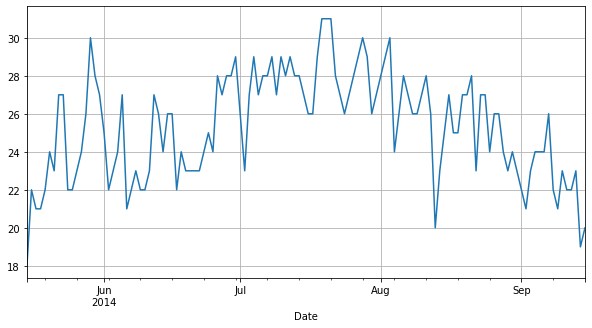

In [17]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

**Let us now see the plot of temperature together with rainfall during this time period**

<AxesSubplot:xlabel='Date'>

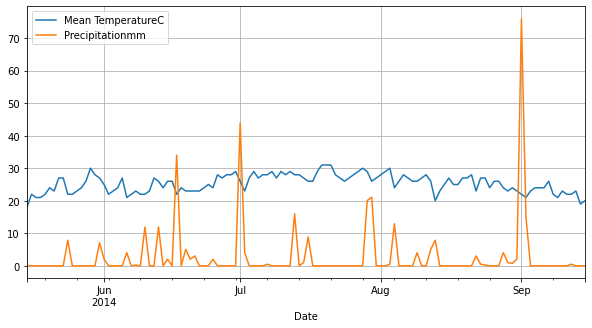

In [14]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

**The second half of August throughly gives an august occasion for vacation.Let's zoom in using a graph,to confirm our suspicion**

<AxesSubplot:xlabel='Date'>

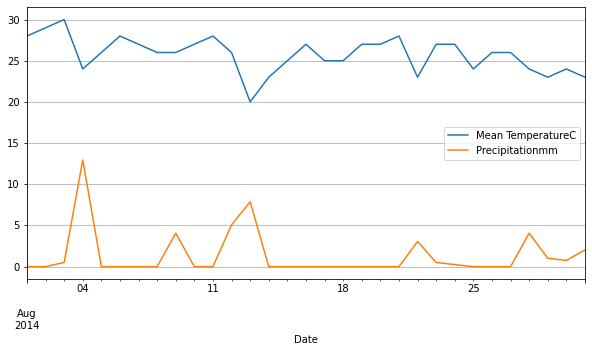

In [18]:
august = summer.loc[datetime(2014,8,1) : datetime(2014,8,31)]
august[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

**Yep!,August 14-28th is just perfect with only 4 days(21st - 23rd,27th-28th) with minimal rainfall.The temperature never falls below 23rd all through**

## Conclusions
The graphs have shown the stability of a Beinjing summer, with ample time for vacation ,the best of the better days were taken.To give better prediction we will need more data for more years.